In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Algerian_forest_fires_dataset.csv",header = 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
##Data cleaning

In [5]:
# Missing values
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


since the dataset is converted into 2 sets based on the region from 122th index

We can make a new column based on the Region

1. "Bejaia Region Dataset"
2. "Sidi-Bel Abbes Region Dataset"

In [7]:
# Adding new column region
data.loc[:122,"Region"] = 0
data.loc[122:,"Region"] = 1
data[["Region"]] = data[["Region"]].astype("int")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [8]:
#Removing 122th row since we dont need and other column which also we no need
data = data.dropna().reset_index(drop = True)

In [9]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [10]:
#so again we are removing this row
data = data.drop([122]).reset_index(drop = True)

In [11]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
## fix spaces in the column names
data.columns = data.columns.str.strip()

In [13]:
## Changing the datatypes of the column to integers
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [14]:
##converting other objects to float
objects = [feature for feature in data.columns if data[feature].dtypes == "O"]
for col in objects:
  if col!="Classes":
    data[col] = data[col].astype(float)

In [15]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [16]:
## Saving the cleaned dataset
data.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index = False)

In [17]:
## Exploratory data analysis

In [18]:
##Making a copy of data
##Dropping day month and year columns
data_cpy = data.drop(["day","month","year"],axis = 1)

In [19]:
data_cpy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
##Encoding categories in classes
## Before that we could see due to some spaces in classes there's an error
data_cpy["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [21]:
## solving the above problem
data_cpy["Classes"] = np.where(data_cpy["Classes"].str.contains("not fire"),0,1)

In [22]:
##Categories in classes
data_cpy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [23]:
## Visualization

<ipython-input-24-5a63bf90d135>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


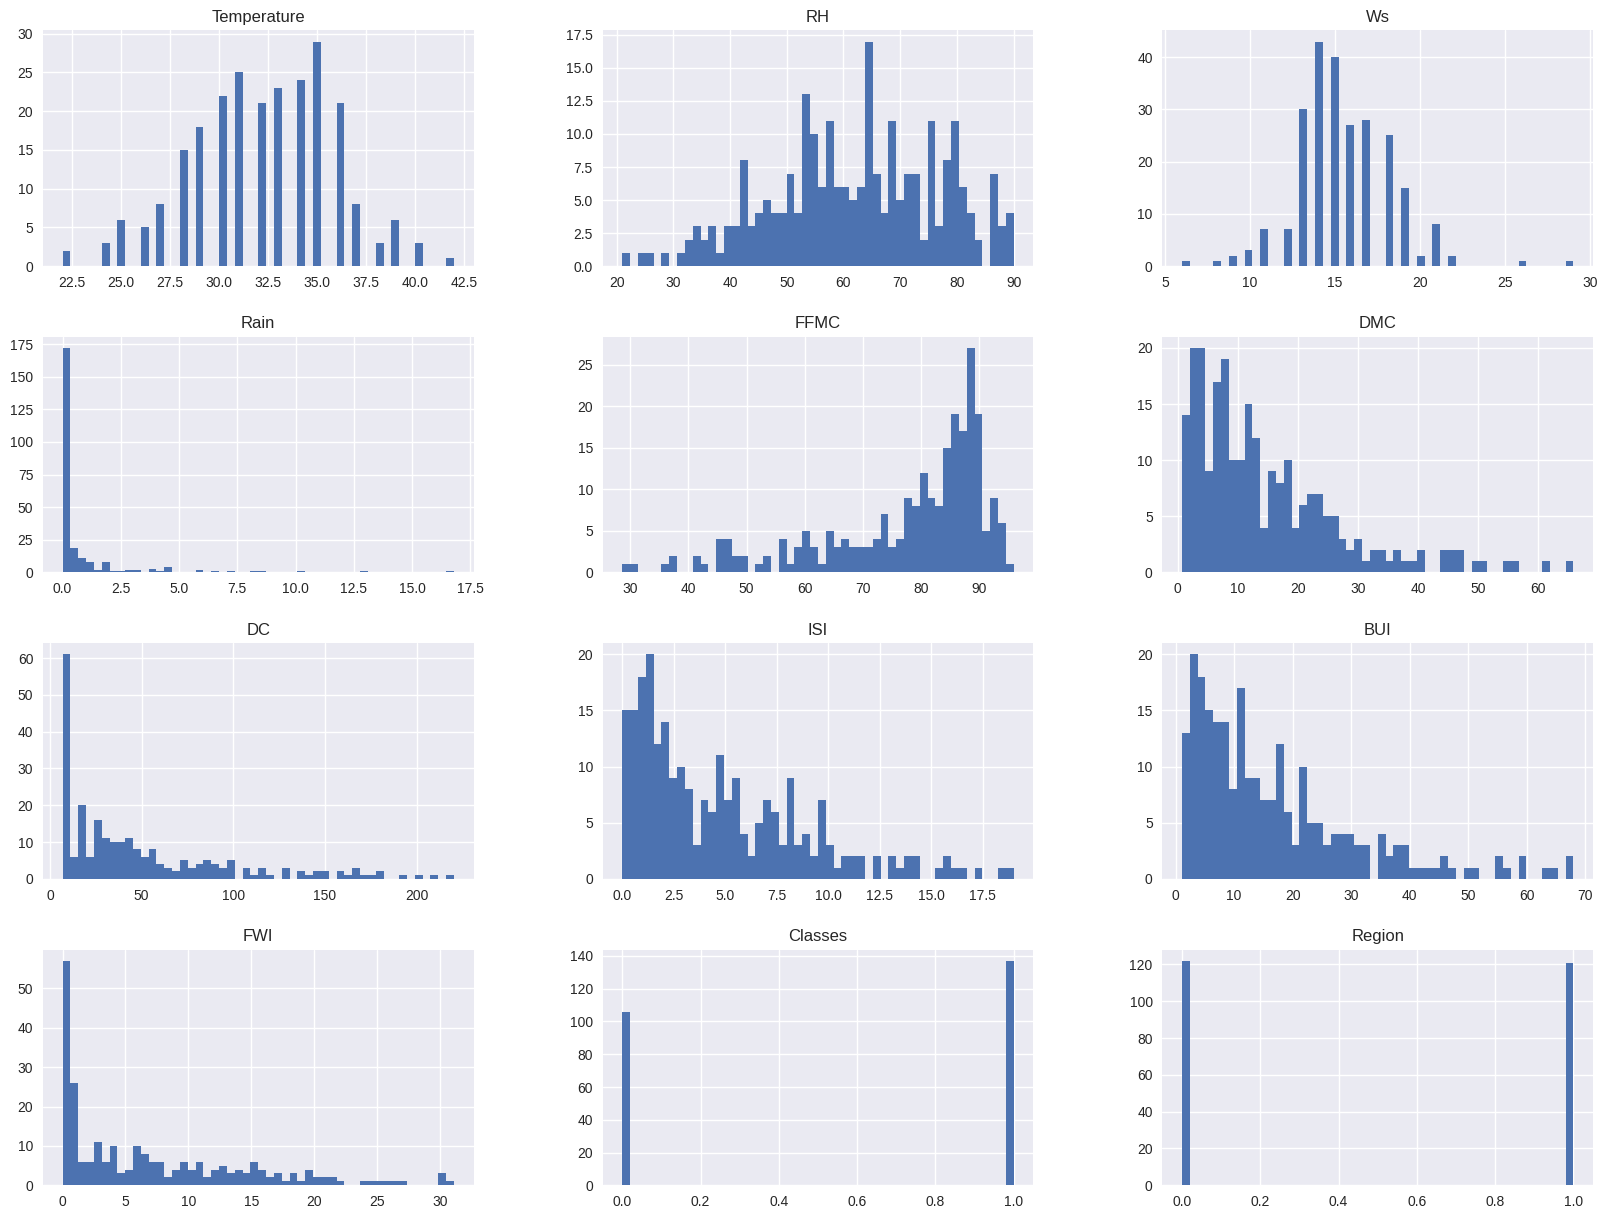

In [24]:
## Plotting density plot for all features
plt.style.use("seaborn")
data_cpy.hist(bins = 50,figsize = (20,15));

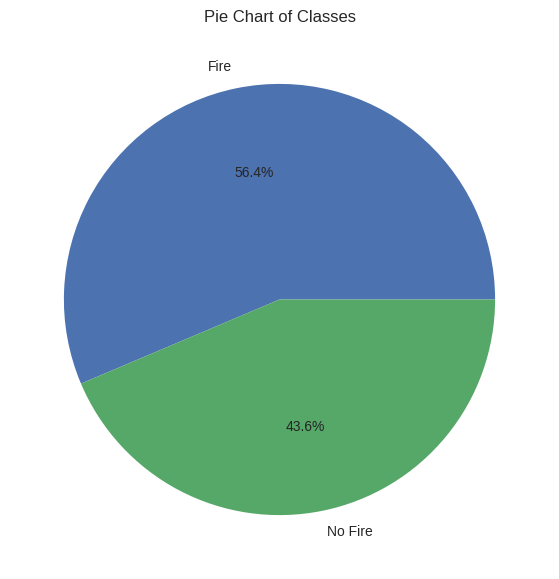

In [25]:
##Pie chart for classes
class_labels = ["Fire","No Fire"]
class_percentage = data_cpy["Classes"].value_counts(normalize = True)*100
plt.figure(figsize = (12,7))
plt.pie(class_percentage,labels = class_labels,autopct = "%1.1f%%")
plt.title("Pie Chart of Classes");

<Axes: >

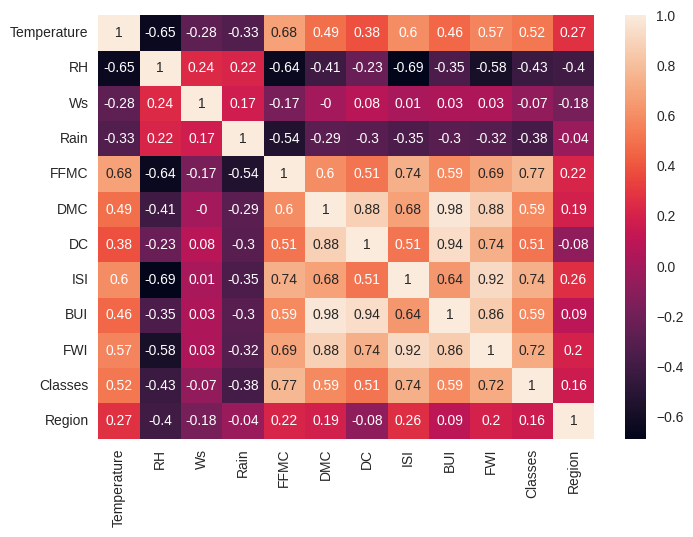

In [26]:
## Correlation
sns.heatmap(round(data_cpy.corr(),2),annot = True)

<Axes: >

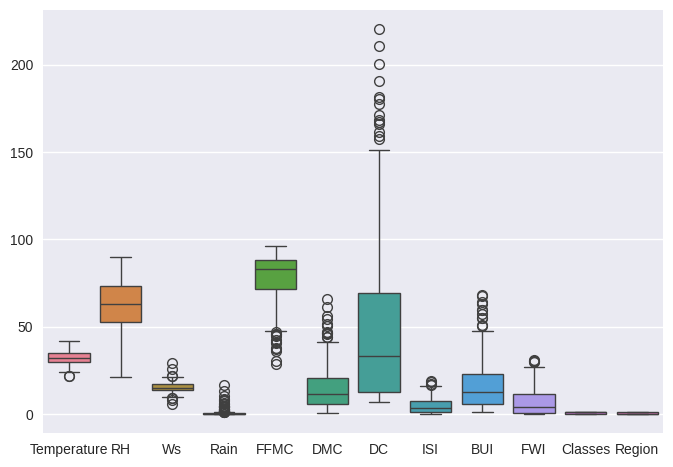

In [27]:
## Box plots to check outliers
sns.boxplot(data_cpy)

In [28]:
data["Classes"] = np.where(data["Classes"].str.contains("not fire"),0,1)

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

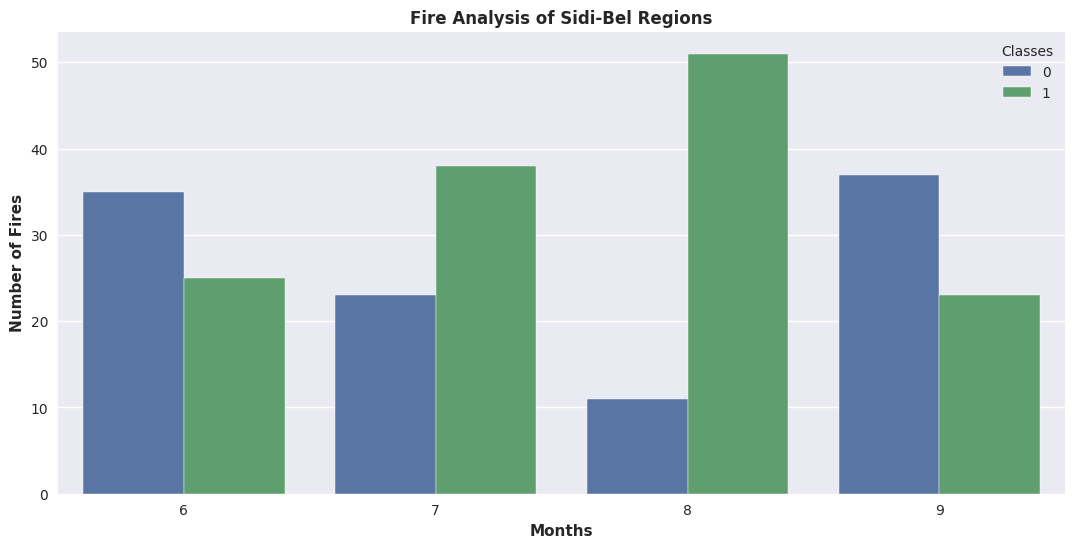

In [29]:
## Monthly Fire Analysis- Sidi-Bel Regions
datatemp = data.loc[data["Region"] == 1]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue ="Classes",data = data)
plt.ylabel("Number of Fires",weight = "bold")
plt.xlabel("Months",weight = "bold")
plt.title("Fire Analysis of Sidi-Bel Regions",weight = "bold")

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

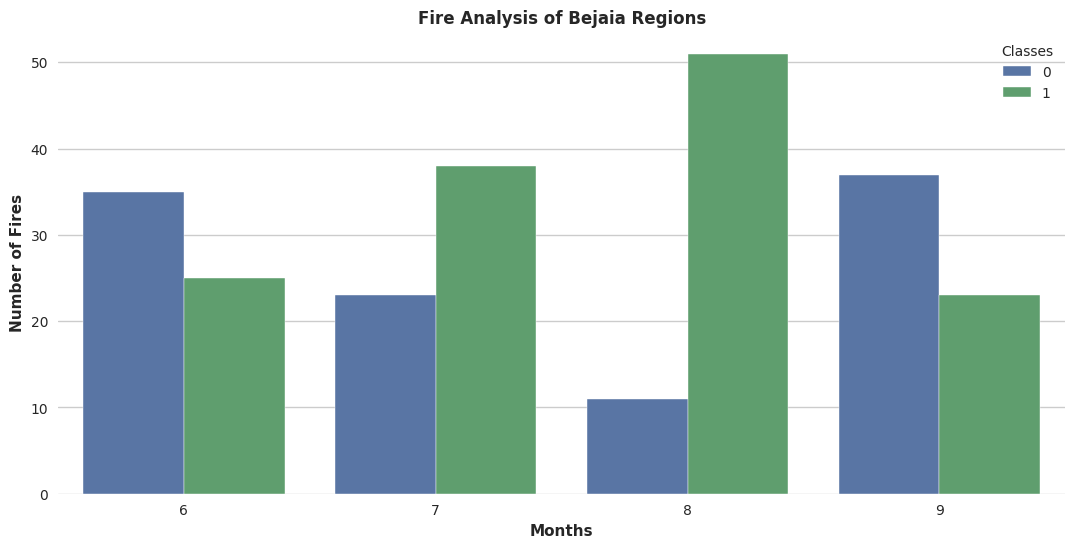

In [30]:
## Monthly Fire Analysis
datatemp = data.loc[data["Region"] == 0]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue ="Classes",data = data)
plt.ylabel("Number of Fires",weight = "bold")
plt.xlabel("Months",weight = "bold")
plt.title("Fire Analysis of Bejaia Regions",weight = "bold")

In [31]:
## Observations
###In july augest most forest fire occurs
###In september we see less fire occurs

## Model training with cleaned data

In [32]:
data = pd.read_csv("/content/Algerian_forest_fires_cleaned_dataset.csv")

In [33]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
#Regression problem to predict FWI
##Dropping month,day and year
data.drop(["day","month","year"],axis =1,inplace = True)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
data["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [37]:
## Encoding
data["Classes"] = np.where(data["Classes"].str.contains("not fire"),0,1)

In [38]:
data["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [39]:
## Indep and dep features
X = data.drop(["FWI"],axis = 1)
y = data["FWI"]

In [40]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [41]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [42]:
#Train,test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


In [43]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

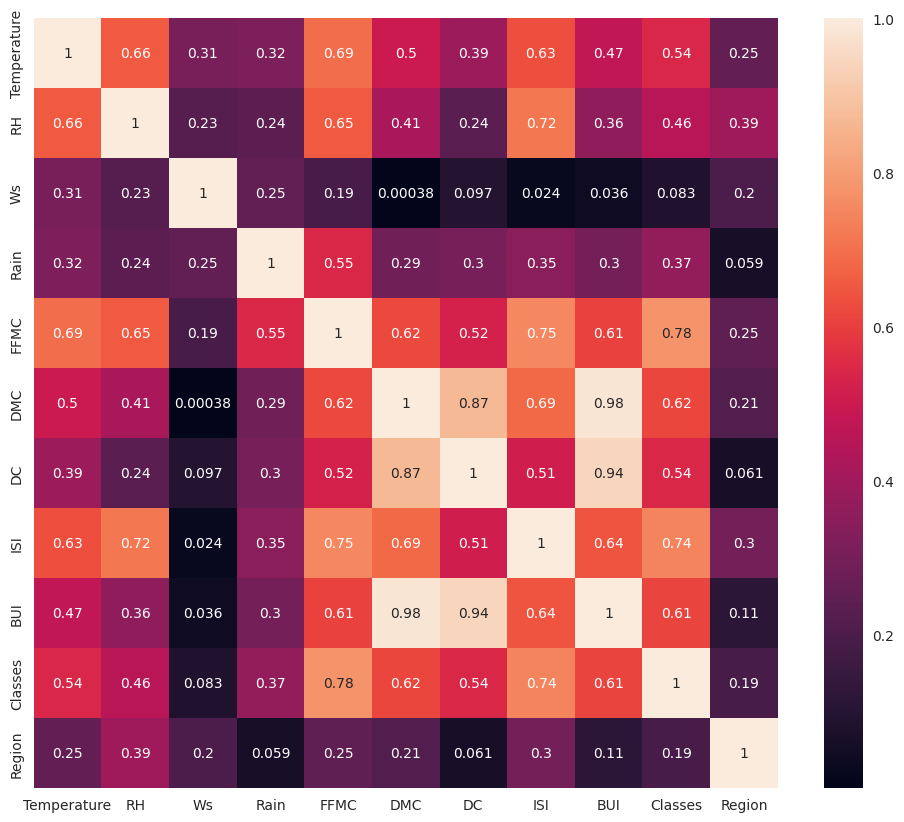

In [44]:
## Feature selection based on correlation
##Checking for multicollinearity
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(np.abs(cor),annot = True)

In [45]:
def filter_method(dataset,threshold):
  corr = dataset.corr()
  col = set()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j]) > threshold:
        colname = corr.columns[i]
        col.add(colname)
  return col

In [46]:
##threshold should be set up by the domain expert
corr_features = filter_method(X_train,0.85)

In [47]:
##Drop these features to reduce the multicollinearity
X_train.drop(corr_features,axis = 1,inplace = True)


In [48]:
X_test.drop(corr_features,axis = 1,inplace = True)

In [49]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [50]:
## Feature scaling/standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<ipython-input-51-8a9ed347d957>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Box plots after standard scaling of train data')

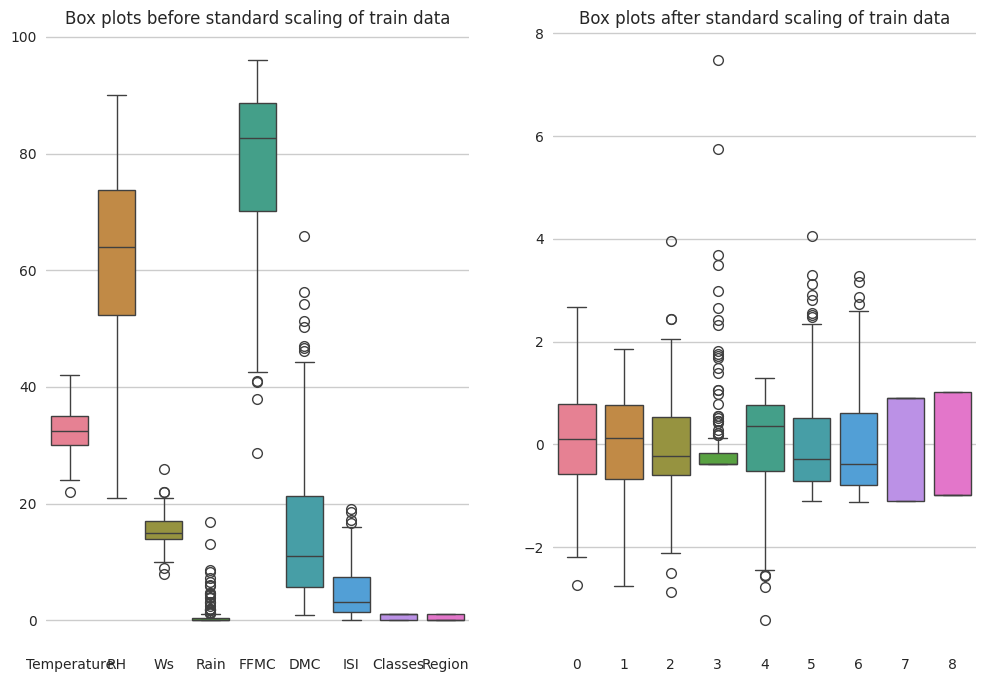

In [51]:
## Box plots to check the effects of standard scaler
plt.subplots(figsize = (12,8))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Box plots before standard scaling of train data")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("Box plots after standard scaling of train data")

In [52]:
##Linear Regression model

MAE: 0.5468236465249986
R2 score : 0.9847657384266951


Text(0, 0.5, 'Predicted FWI values')

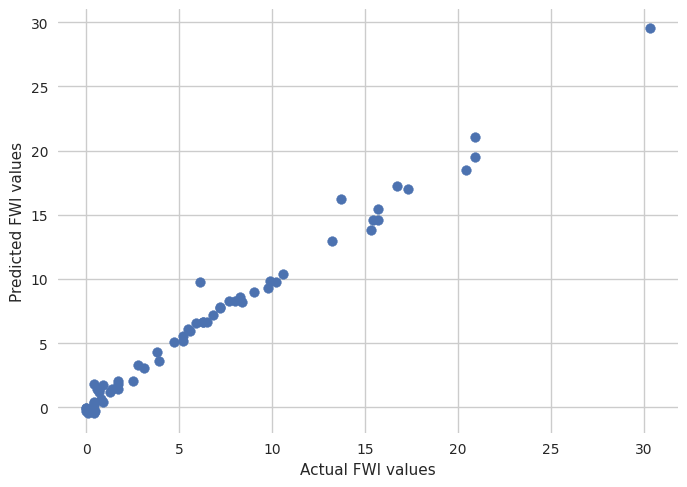

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test,y_pred)
print(f"R2 score : {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

MAE: 1.133175994914409
R2 Score: 0.9492020263112388


Text(0, 0.5, 'Predicted FWI values')

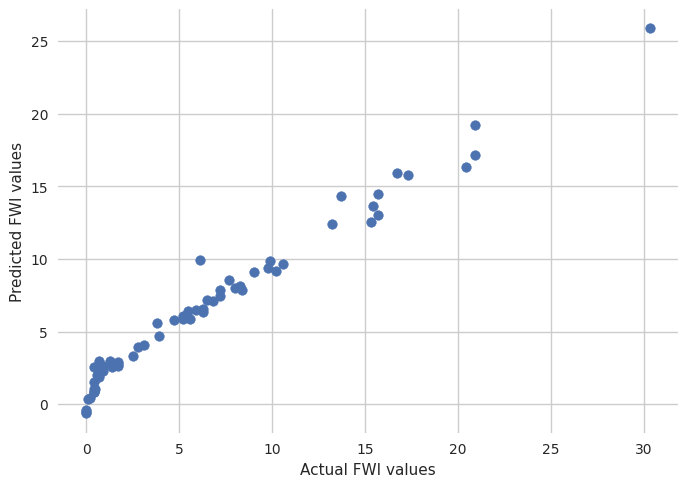

In [54]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

MAE: 0.5642305340105692
R2 Score: 0.9842993364555513


Text(0, 0.5, 'Predicted FWI values')

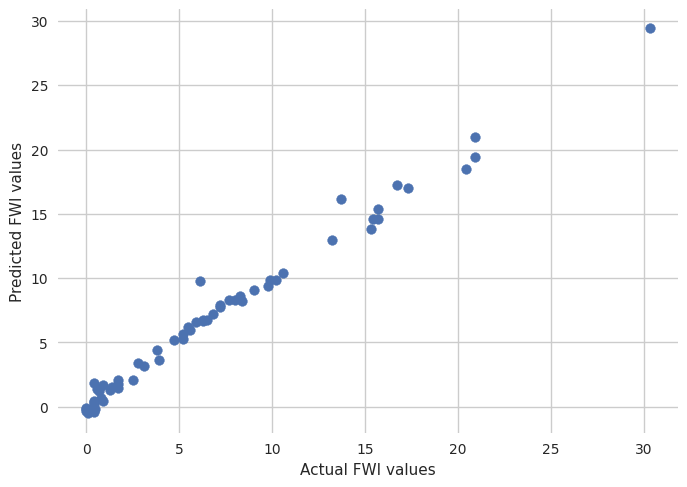

In [55]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

MAE: 1.8822353634896005
R2 Score: 0.8753460589519703


Text(0, 0.5, 'Predicted FWI values')

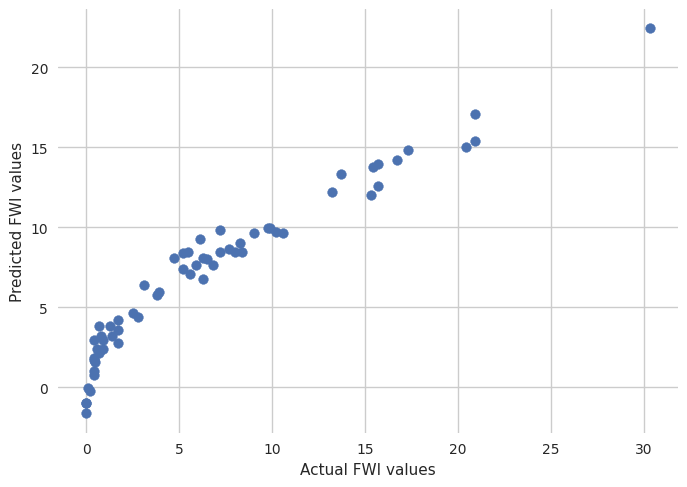

In [56]:
##Elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

In [57]:
#Lasso Cv crossvalidation
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [58]:
lasso_cv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [59]:
lasso_cv.alpha_

0.05725391318234411

In [60]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [61]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

MAE: 0.6199701158263433
R2 Score: 0.9820946715928275


Text(0, 0.5, 'Predicted FWI values')

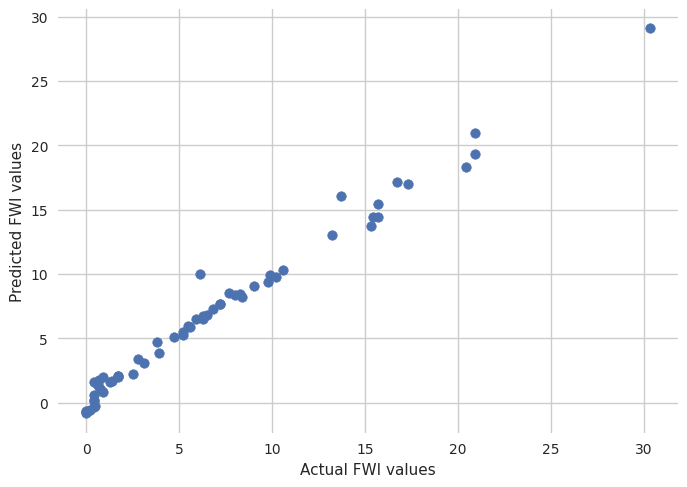

In [62]:
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

MAE: 0.5642305340105692
R2 Score: 0.9842993364555513


Text(0, 0.5, 'Predicted FWI values')

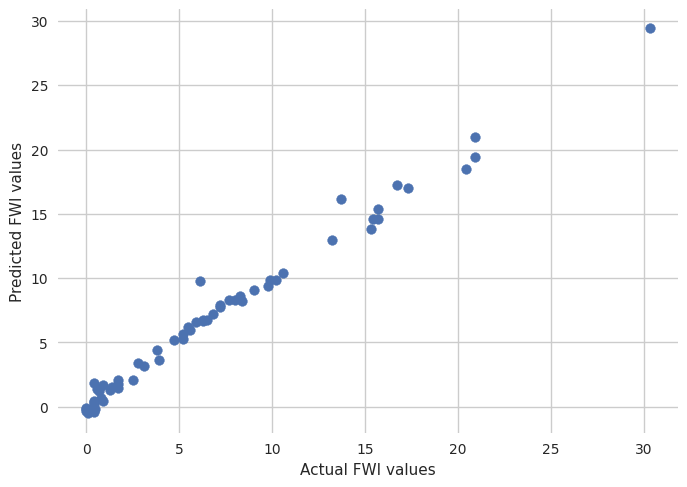

In [63]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv = 5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

In [65]:
ridge_cv.alpha_

1.0

MAE: 0.6575946731430898
R2 Score: 0.9814217587854941


Text(0, 0.5, 'Predicted FWI values')

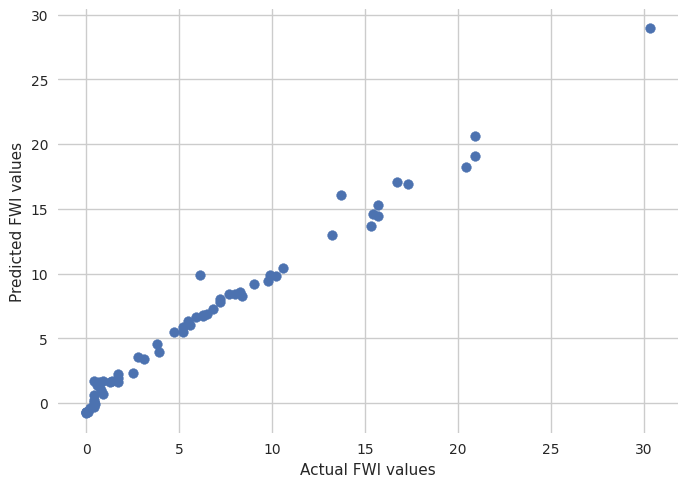

In [66]:
## Elastic net regression
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(cv = 5)
elastic_cv.fit(X_train_scaled,y_train)
y_pred = elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual FWI values")
plt.ylabel("Predicted FWI values")

In [71]:
elastic_cv.alphas_

array([1.41170600e+01, 1.31656174e+01, 1.22782989e+01, 1.14507826e+01,
       1.06790382e+01, 9.95930678e+00, 9.28808283e+00, 8.66209714e+00,
       8.07830078e+00, 7.53385034e+00, 7.02609405e+00, 6.55255882e+00,
       6.11093829e+00, 5.69908150e+00, 5.31498248e+00, 4.95677045e+00,
       4.62270071e+00, 4.31114616e+00, 4.02058933e+00, 3.74961507e+00,
       3.49690356e+00, 3.26122397e+00, 3.04142839e+00, 2.83644629e+00,
       2.64527931e+00, 2.46699633e+00, 2.30072904e+00, 2.14566760e+00,
       2.00105679e+00, 1.86619226e+00, 1.74041714e+00, 1.62311885e+00,
       1.51372607e+00, 1.41170600e+00, 1.31656174e+00, 1.22782989e+00,
       1.14507826e+00, 1.06790382e+00, 9.95930678e-01, 9.28808283e-01,
       8.66209714e-01, 8.07830078e-01, 7.53385034e-01, 7.02609405e-01,
       6.55255882e-01, 6.11093829e-01, 5.69908150e-01, 5.31498248e-01,
       4.95677045e-01, 4.62270071e-01, 4.31114616e-01, 4.02058933e-01,
       3.74961507e-01, 3.49690356e-01, 3.26122397e-01, 3.04142839e-01,
      

In [72]:
## saving the scalar and the model as pkl file
import pickle
pickle.dump(sc,open("standard_scaler.pkl","wb"))
pickle.dump(ridge_cv,open("ridge_model.pkl","wb"))
